In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
#import sklearn.cluster.hierarchical as hclust
from sklearn import preprocessing
import seaborn as sns

In [75]:
from pathlib import Path

In [124]:
from webrep import repo

Loading the data

In [81]:
df = pd.read_csv('dataset.csv')

print(df.shape)
df.head()

(69, 10)


,Car,Company,Engine,Power,Length,Width,Height,Wheelbase,Price,Sales
0,Tiguan,volkswagen,1984,190,4509,1839,1665,2679,3350000,103
1,Virtus,volkswagen,999,115,4561,1752,1507,2651,1468333,1439
2,Taigun,volkswagen,999,115,4221,1760,1612,2651,1536714,1680
3,Kiger,renault,999,72,3991,1750,1600,2500,849499,2691
4,Triber,renault,999,72,3990,1739,1643,2636,755200,3008


Set features

In [40]:
features = df.drop(['Company','Car','Sales'],axis=1)
# features['Revenue'] = features['Price'] * features['Sales']

In [41]:
features.describe

<bound method NDFrame.describe of     Engine  Power  Length  Width  Height  Wheelbase    Price
0     1984    190    4509   1839    1665       2679  3350000
1      999    115    4561   1752    1507       2651  1468333
2      999    115    4221   1760    1612       2651  1536714
3      999     72    3991   1750    1600       2500   849499
4      999     72    3990   1739    1643       2636   755200
..     ...    ...     ...    ...     ...        ...      ...
64    1462     88    4395   1735    1690       2740  1087444
65    1197     90    3995   1735    1515       2450   808000
66     998     57    3565   1520    1567       2380   543500
67     998     57    3655   1620    1675       2435   645500
68    1196     73    3675   1475    1825       2350   596384

[69 rows x 7 columns]>

In [42]:
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(features)

In [43]:
pd.DataFrame(features_normal).describe()

,0,1,2,3,4,5,6
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,0.327807,0.299296,0.446099,0.589628,0.381144,0.375431,0.159679
std,0.246006,0.179468,0.220499,0.189514,0.253644,0.227084,0.168798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.103624,0.165493,0.290426,0.509804,0.146237,0.204082,0.050035
50%,0.205717,0.260563,0.462766,0.617647,0.369892,0.353741,0.102391
75%,0.592139,0.419014,0.613298,0.713725,0.539785,0.537415,0.193275
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Finding cluster count

In [44]:
inertia = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(features_normal)
    kmeanModel.fit(features_normal)
    inertia.append(kmeanModel.inertia_)

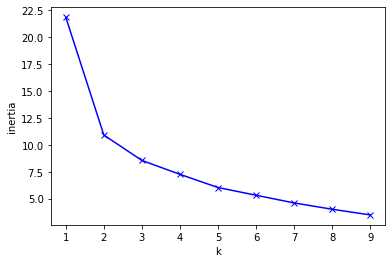

In [45]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

Testing for 4 clusters

In [53]:
kmeans = KMeans(n_clusters=3).fit(features_normal)

In [54]:
labels = pd.DataFrame(kmeans.labels_)

labeledCars = pd.concat((features,labels),axis=1)

labeledCars = labeledCars.rename({0:'labels'},axis=1)

In [55]:
labeledCars.head()

,Engine,Power,Length,Width,Height,Wheelbase,Price,labels
0,1984,190,4509,1839,1665,2679,3350000,0
1,999,115,4561,1752,1507,2651,1468333,2
2,999,115,4221,1760,1612,2651,1536714,1
3,999,72,3991,1750,1600,2500,849499,2
4,999,72,3990,1739,1643,2636,755200,2


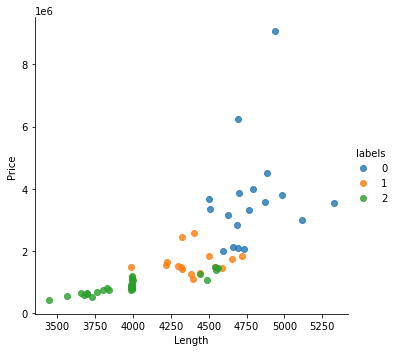

In [58]:
sns.lmplot(x='Length',y='Price',data=labeledCars,hue='labels',fit_reg=False)

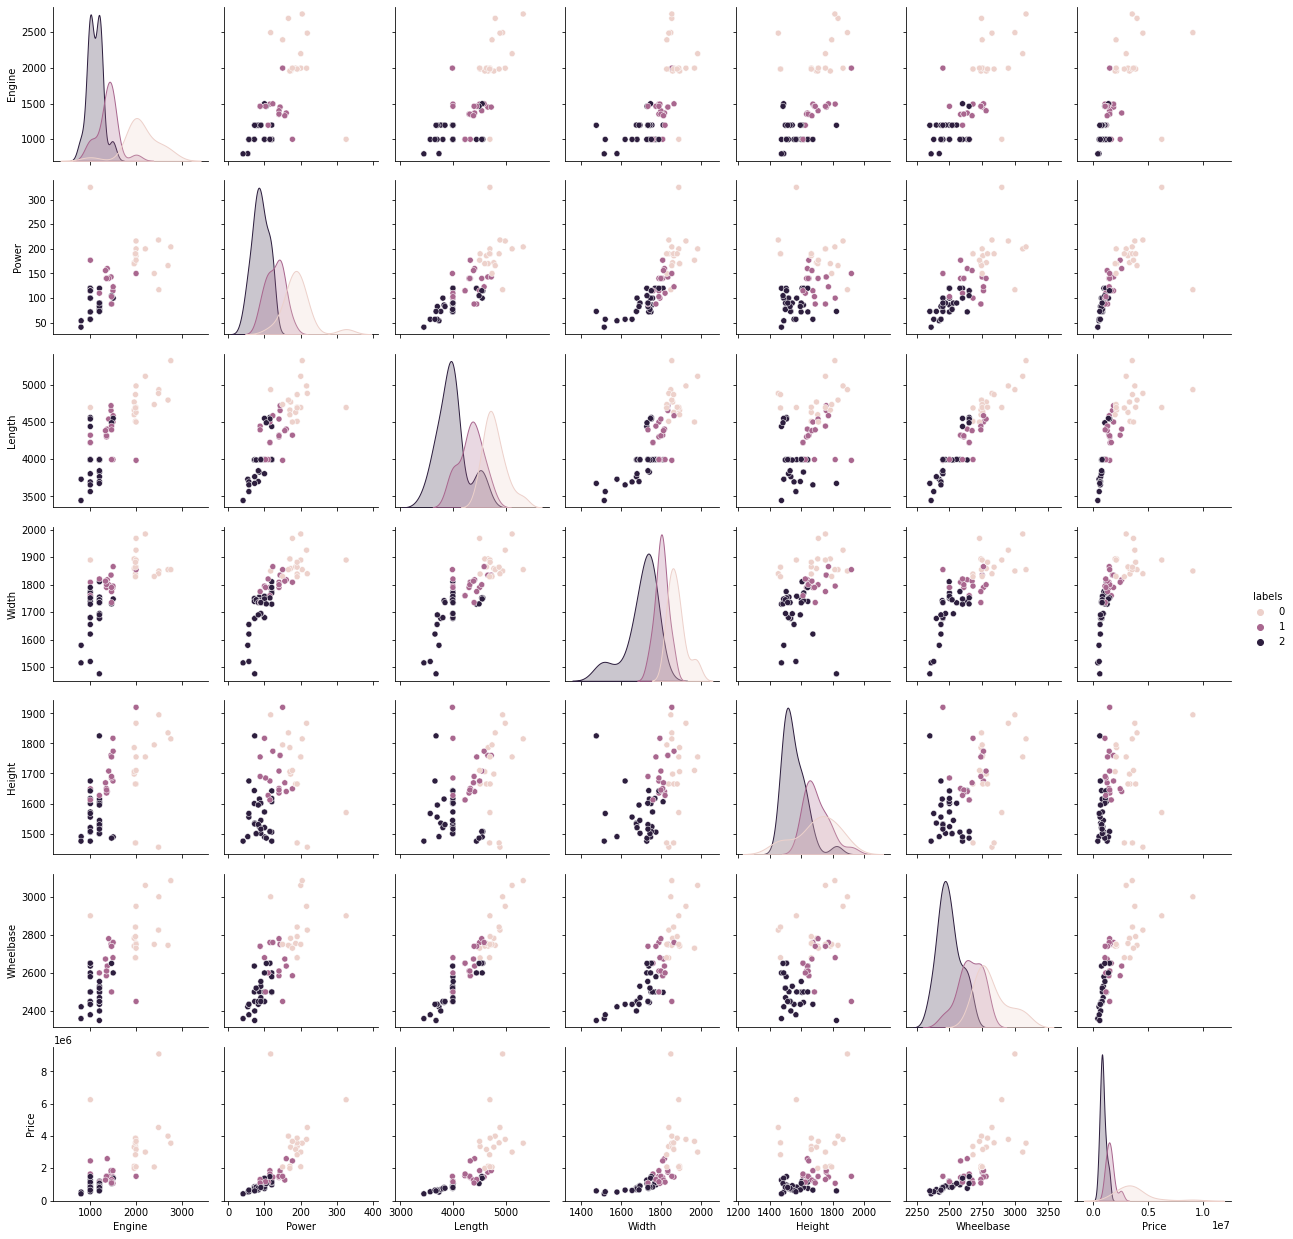

In [57]:
sns.pairplot(labeledCars,hue='labels')

In [66]:
labeledCars['Constant'] = 'Data'

<AxesSubplot:xlabel='Constant', ylabel='Length'>

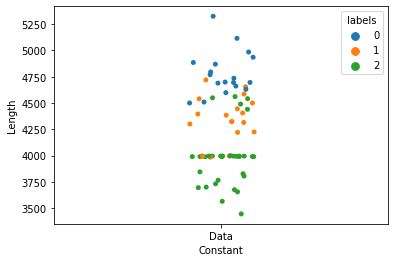

In [80]:
sns.stripplot(x=labeledCars['Constant'],y=labeledCars['Length'],hue=labeledCars['labels'],jitter=True)

In [74]:
cars = df['Car']
cars = pd.concat((df,labels),axis=1)

cars = cars.rename({0:'Cluster'},axis=1)



,Car,Company,Engine,Power,Length,Width,Height,Wheelbase,Price,Sales,Cluster
0,Tiguan,volkswagen,1984,190,4509,1839,1665,2679,3350000,103,0
1,Virtus,volkswagen,999,115,4561,1752,1507,2651,1468333,1439,2
2,Taigun,volkswagen,999,115,4221,1760,1612,2651,1536714,1680,1
3,Kiger,renault,999,72,3991,1750,1600,2500,849499,2691,2
4,Triber,renault,999,72,3990,1739,1643,2636,755200,3008,2
...,...,...,...,...,...,...,...,...,...,...,...
64,Ertiga,maruti-arena,1462,88,4395,1735,1690,2740,1087444,10507,1
65,Dzire,maruti-arena,1197,90,3995,1735,1515,2450,808000,12431,2
66,S-Presso,maruti-arena,998,57,3565,1520,1567,2380,543500,5114,2
67,Wagon R,maruti-arena,998,57,3655,1620,1675,2435,645500,18819,2


## Price dependent clustering

In [76]:
cars.to_csv('/Users/nitinrajesh/Code/CarPriori/out.csv')

In [83]:
df = pd.read_csv('out.csv')

print(df.shape)
df.head()

(69, 12)


,i,Car,Company,Engine,Power,Length,Width,Height,Wheelbase,Price,Sales,Cluster
0,0,Tiguan,volkswagen,1984,190,4509,1839,1665,2679,3350000,103,0
1,1,Virtus,volkswagen,999,115,4561,1752,1507,2651,1468333,1439,2
2,2,Taigun,volkswagen,999,115,4221,1760,1612,2651,1536714,1680,1
3,3,Kiger,renault,999,72,3991,1750,1600,2500,849499,2691,2
4,4,Triber,renault,999,72,3990,1739,1643,2636,755200,3008,2


In [84]:
features = df.drop(['i','Company','Car','Engine','Power','Length','Width','Height','Wheelbase'],axis=1)
features['Revenue'] = features['Price'] * features['Sales']

In [85]:
features.describe

<bound method NDFrame.describe of       Price  Sales  Cluster      Revenue
0   3350000    103        0    345050000
1   1468333   1439        2   2112931187
2   1536714   1680        1   2581679520
3    849499   2691        2   2286001809
4    755200   3008        2   2271641600
..      ...    ...      ...          ...
64  1087444  10507        1  11425774108
65   808000  12431        2  10044248000
66   543500   5114        2   2779459000
67   645500  18819        2  12147664500
68   596384  10653        2   6353278752

[69 rows x 4 columns]>

In [86]:
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(features)

In [87]:
pd.DataFrame(features_normal).describe()

,0,1,2,3
count,69.000000,69.000000,69.000000,69.000000
mean,0.159679,0.246695,0.601449,0.253245
std,0.168798,0.260468,0.416390,0.243408
min,0.000000,0.000000,0.000000,0.000000
25%,0.050035,0.027345,0.000000,0.061022
50%,0.102391,0.158855,0.500000,0.174912
75%,0.193275,0.334841,1.000000,0.370353
max,1.000000,1.000000,1.000000,1.000000


In [88]:
inertia = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(features_normal)
    kmeanModel.fit(features_normal)
    inertia.append(kmeanModel.inertia_)

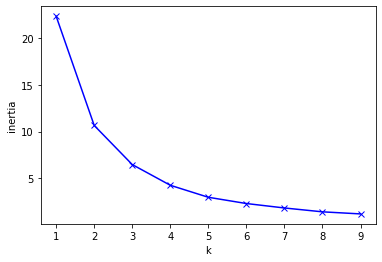

In [89]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [102]:
kmeans = KMeans(n_clusters=6).fit(features_normal)

In [103]:
labels = pd.DataFrame(kmeans.labels_)

labeledCars = pd.concat((features,labels),axis=1)

labeledCars = labeledCars.rename({0:'labels'},axis=1)

In [104]:
labeledCars.head()

,Price,Sales,Cluster,Revenue,labels
0,3350000,103,0,345050000,0
1,1468333,1439,2,2112931187,1
2,1536714,1680,1,2581679520,4
3,849499,2691,2,2286001809,1
4,755200,3008,2,2271641600,1


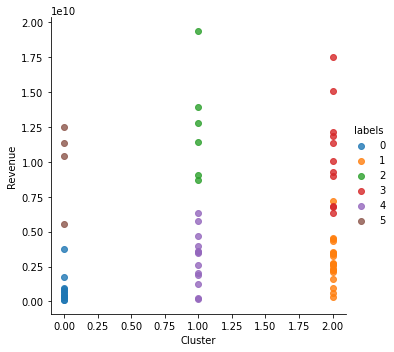

In [114]:
sns.lmplot(x='Cluster',y='Revenue',data=labeledCars,hue='labels',fit_reg=False)

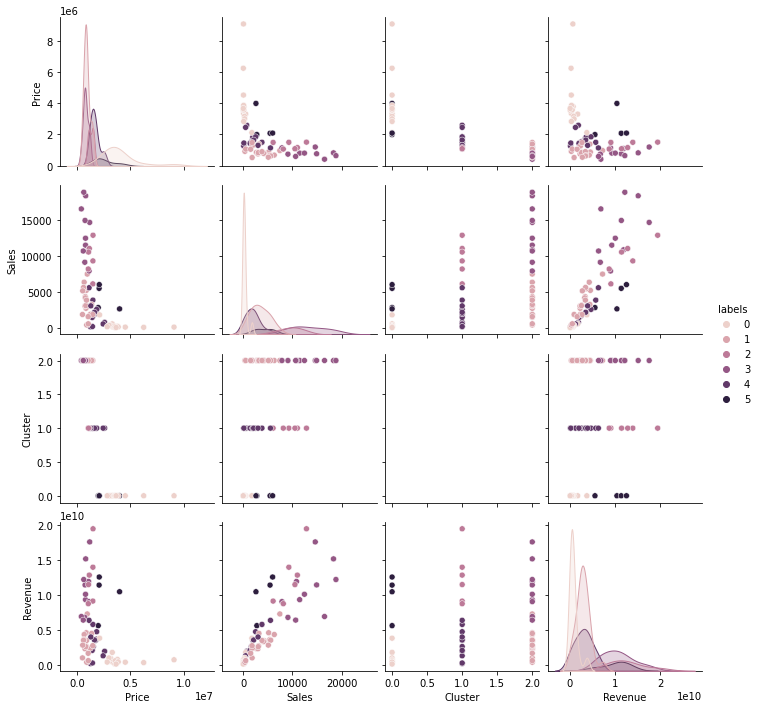

In [106]:
sns.pairplot(labeledCars,hue='labels')

In [112]:
labeledCars['Constant'] = 'Data'

<AxesSubplot:xlabel='Constant', ylabel='Price'>

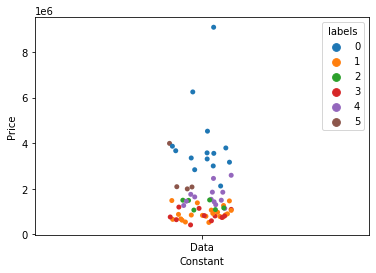

In [118]:
sns.stripplot(x=labeledCars['Constant'],y=labeledCars['Price'],hue=labeledCars['labels'],jitter=True)

In [119]:
cars = df['Car']
cars = pd.concat((df,labels),axis=1)

cars = cars.rename({0:'SalesGroup'},axis=1)

In [121]:
cars = cars.drop(['i'],axis=1)

In [128]:
cars['SalesGroup'] = cars['SalesGroup'].replace([0,1,2,3,4,5],['L0','L2','P1','P2','L1','P0'])

cars

,Car,Company,Engine,Power,Length,Width,Height,Wheelbase,Price,Sales,Cluster,SalesGroup
0,Tiguan,volkswagen,1984,190,4509,1839,1665,2679,3350000,103,0,L0
1,Virtus,volkswagen,999,115,4561,1752,1507,2651,1468333,1439,2,L2
2,Taigun,volkswagen,999,115,4221,1760,1612,2651,1536714,1680,1,L1
3,Kiger,renault,999,72,3991,1750,1600,2500,849499,2691,2,L2
4,Triber,renault,999,72,3990,1739,1643,2636,755200,3008,2,L2
...,...,...,...,...,...,...,...,...,...,...,...,...
64,Ertiga,maruti-arena,1462,88,4395,1735,1690,2740,1087444,10507,1,P1
65,Dzire,maruti-arena,1197,90,3995,1735,1515,2450,808000,12431,2,P2
66,S-Presso,maruti-arena,998,57,3565,1520,1567,2380,543500,5114,2,L2
67,Wagon R,maruti-arena,998,57,3655,1620,1675,2435,645500,18819,2,P2


In [129]:
cars.to_csv('/Users/nitinrajesh/Code/CarPriori/result.csv')

In [132]:
rp = repo('CarPriori-dataset')
salesGrp = ['L0','L2','P1','P2','L1','P0']
for index, row in cars.iterrows():
    #rp.getData(row['Company']+'/'+row['Car']+'.json')
    rp.addParamToFile(row['Company']+'/'+row['Car']+'.json','Cluster',row['Cluster'])
    rp.addParamToFile(row['Company']+'/'+row['Car']+'.json','SalesGroup',row['SalesGroup'])
    print(row['Car'],row['Company'],row['Cluster'],row['SalesGroup'])


    

{'Car': 'Tiguan', 'Engine': {'Engine Displacement': '1984 cc', 'Cylinders': '4', 'Max Power': '190PS @ 6000rpm', 'Max Torque': '320Nm @ 1500 - 4100rpm', 'Transmission': '7-speed DCT', 'Kerb Weight': '1703Kg', 'Power:Weight': '111.57PS/tonne', 'Torque:Weight': '187.90NM/tonne'}, 'Dimensions': {'Length': '4509', 'Width': '1839', 'Height': '1665', 'Wheelbase': '2679'}, 'Sales': ['60', '124', '155', '123', '83', '76'], 'Image': 'https://www.v3cars.com/media/model-imgs/1644825624-Tiguan.jpg', 'Prices': [3350000], 'Company': 'volkswagen', 'Cluster': 0}
{'Car': 'Tiguan', 'Engine': {'Engine Displacement': '1984 cc', 'Cylinders': '4', 'Max Power': '190PS @ 6000rpm', 'Max Torque': '320Nm @ 1500 - 4100rpm', 'Transmission': '7-speed DCT', 'Kerb Weight': '1703Kg', 'Power:Weight': '111.57PS/tonne', 'Torque:Weight': '187.90NM/tonne'}, 'Dimensions': {'Length': '4509', 'Width': '1839', 'Height': '1665', 'Wheelbase': '2679'}, 'Sales': ['60', '124', '155', '123', '83', '76'], 'Image': 'https://www.v3cars